In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
city_data_df = pd.read_csv("./Resources/city_data.csv")
ride_data_df = pd.read_csv("./Resources/ride_data.csv")

In [3]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame

In [4]:
#  1. Get the total rides for each city type
total_rides_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
drivers_by_city = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_by_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = sum_fares_by_type / total_rides_type 
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = sum_fares_by_type / drivers_by_city
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [36]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides_type,
                                "Total Drivers": drivers_by_city,
                                "Total Fares": sum_fares_by_type,
                                "Average Fare per Ride": average_fare_per_ride,
                                "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [37]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
# Display the data frame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


# Deliverable 2. Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [38]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3.908450e+12,46,Urban


In [39]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
sum_of_fares

fare
type  date                   
Rural 01/01/2019 09:45  43.69
      01/02/2019 08:59  17.05
      01/04/2019 09:32  21.63
      01/04/2019 13:39  26.73
      01/04/2019 16:37  54.65
...                       ...
Urban 31/03/2019 11:49  24.16
      31/03/2019 13:58  29.41
      31/03/2019 14:58   7.67
      31/03/2019 15:22  30.77
      31/03/2019 17:01  36.29

[2364 rows x 1 columns]

In [40]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_of_fares = sum_of_fares.reset_index()
sum_of_fares

,type,date,fare
0,Rural,01/01/2019 09:45,43.69
1,Rural,01/02/2019 08:59,17.05
2,Rural,01/04/2019 09:32,21.63
3,Rural,01/04/2019 13:39,26.73
4,Rural,01/04/2019 16:37,54.65
...,...,...,...
2359,Urban,31/03/2019 11:49,24.16
2360,Urban,31/03/2019 13:58,29.41
2361,Urban,31/03/2019 14:58,7.67
2362,Urban,31/03/2019 15:22,30.77


In [41]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

sum_of_fares_pivot = sum_of_fares.pivot(index = "date", columns = "type", values = "fare")
sum_of_fares_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
01/01/2019 00:08,NaN,NaN,37.91
01/01/2019 00:46,NaN,47.74,NaN
01/01/2019 02:07,NaN,24.07,NaN
01/01/2019 03:46,NaN,NaN,7.57
01/01/2019 05:23,NaN,NaN,10.75
01/01/2019 09:45,43.69,NaN,NaN
01/01/2019 12:32,NaN,25.56,NaN
01/01/2019 14:40,NaN,NaN,5.42
01/01/2019 14:42,NaN,NaN,12.31


In [42]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
sum_of_fares_pivot.index = pd.to_datetime(sum_of_fares_pivot.index)
sum_of_fares_pivot


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-03-31 11:49:00,NaN,NaN,24.16
2019-03-31 13:58:00,NaN,NaN,29.41
2019-03-31 14:58:00,NaN,NaN,7.67


In [43]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_jan_april = sum_of_fares_pivot.loc['2019-01-01':'2019-04-28']
fares_jan_april


C:\Users\Jp\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-03-31 11:49:00,NaN,NaN,24.16
2019-03-31 13:58:00,NaN,NaN,29.41
2019-03-31 14:58:00,NaN,NaN,7.67


In [44]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_jan_april.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1687 entries, 2019-01-01 00:08:00 to 2019-03-31 17:01:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     89 non-null     float64
 1   Suburban  456 non-null    float64
 2   Urban     1144 non-null   float64
dtypes: float64(3)
memory usage: 52.7 KB


In [45]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_jan_april_week = fares_jan_april.resample("W").sum()
fares_jan_april_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,186.19,643.96,1325.22
2019-01-13,0.00,137.26,189.35
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,337.34,1105.31,2144.26
2019-02-10,127.35,513.65,504.76
2019-02-17,70.04,753.29,1632.06
2019-02-24,419.06,1412.74,2466.29
2019-03-03,225.85,947.34,2163.24


In [46]:
sum1= fares_jan_april_week.rename_axis(None, axis=0)

sum1

type,Rural,Suburban,Urban
2019-01-06,186.19,643.96,1325.22
2019-01-13,0.00,137.26,189.35
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,337.34,1105.31,2144.26
2019-02-10,127.35,513.65,504.76
2019-02-17,70.04,753.29,1632.06
2019-02-24,419.06,1412.74,2466.29
2019-03-03,225.85,947.34,2163.24
2019-03-10,38.92,303.28,875.21


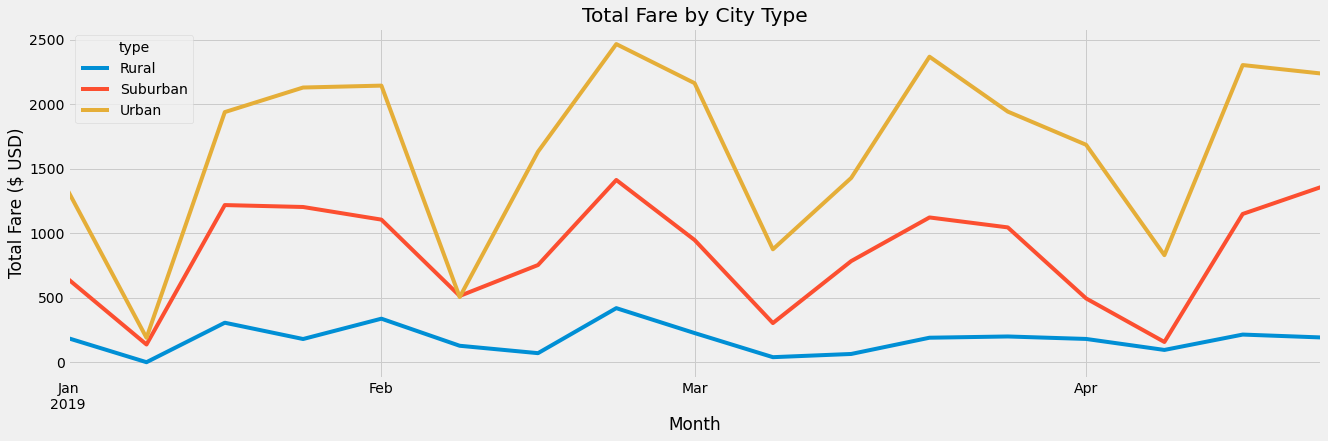

In [47]:
#create a line graph of each y value in relation to x value
#x is date and y is rural, suburban, urban (fares)

from matplotlib import style

style.use('fivethirtyeight')

ax = sum1.plot(figsize = (20,6))
plt.plot(color = "red")
ax.set_title("Total Fare by City Type")
ax.set_xlabel("Month")
ax.set_ylabel("Total Fare ($ USD)")
plt.savefig("./Analysis/Linegraph.png")
plt.show()